# Final Project

# San Francisco Crime Classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [96]:
#Get training data
train = pd.read_csv('train.csv')

In [97]:
print("Train:{}".format(train.shape))

Train:(878049, 9)


In [98]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [99]:
#Searching for null values in training data
train=pd.read_csv('train.csv', na_values=['-','?'])
train[train.isnull().any(axis=1)]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y


We are removing the features descript and resolution because they are known after the crime had occured and they doesn't really help in categorizing the crime. We are also removing address field because the X and Y values exactly tells about the crime spot and no need of the address. 

In [100]:
train.Address

0                 OAK ST / LAGUNA ST
1                 OAK ST / LAGUNA ST
2          VANNESS AV / GREENWICH ST
3           1500 Block of LOMBARD ST
4          100 Block of BRODERICK ST
                     ...            
878044    FARALLONES ST / CAPITOL AV
878045          600 Block of EDNA ST
878046            5TH ST / FOLSOM ST
878047          TOWNSEND ST / 2ND ST
878048      1800 Block of NEWCOMB AV
Name: Address, Length: 878049, dtype: object

In [101]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [102]:
train[['Block_Number','Street_Name']] = train['Address'].str.split(n=1, expand=True)

In [103]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Block_Number,Street_Name
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OAK,ST / LAGUNA ST
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OAK,ST / LAGUNA ST
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,VANNESS,AV / GREENWICH ST
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,1500,Block of LOMBARD ST
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,100,Block of BRODERICK ST
...,...,...,...,...,...,...,...,...,...,...,...
878044,1/6/2003 0:15,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,FARALLONES,ST / CAPITOL AV
878045,1/6/2003 0:01,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447363,37.731948,600,Block of EDNA ST
878046,1/6/2003 0:01,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,5TH,ST / FOLSOM ST
878047,1/6/2003 0:01,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,TOWNSEND,ST / 2ND ST


In [104]:
#Removing Descript, Resolution and Address fields from train
train.drop(['Descript','Resolution','Address'], axis=1, inplace=True)

In [105]:
train.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name
0,5/13/2015 23:53,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST
1,5/13/2015 23:53,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST
2,5/13/2015 23:33,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST
3,5/13/2015 23:30,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST
4,5/13/2015 23:30,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST


In [106]:
cat_list=train.Category.unique().tolist()
cat_list
#print("Categories:{}".format(cat_list))

['WARRANTS',
 'OTHER OFFENSES',
 'LARCENY/THEFT',
 'VEHICLE THEFT',
 'VANDALISM',
 'NON-CRIMINAL',
 'ROBBERY',
 'ASSAULT',
 'WEAPON LAWS',
 'BURGLARY',
 'SUSPICIOUS OCC',
 'DRUNKENNESS',
 'FORGERY/COUNTERFEITING',
 'DRUG/NARCOTIC',
 'STOLEN PROPERTY',
 'SECONDARY CODES',
 'TRESPASS',
 'MISSING PERSON',
 'FRAUD',
 'KIDNAPPING',
 'RUNAWAY',
 'DRIVING UNDER THE INFLUENCE',
 'SEX OFFENSES FORCIBLE',
 'PROSTITUTION',
 'DISORDERLY CONDUCT',
 'ARSON',
 'FAMILY OFFENSES',
 'LIQUOR LAWS',
 'BRIBERY',
 'EMBEZZLEMENT',
 'SUICIDE',
 'LOITERING',
 'SEX OFFENSES NON FORCIBLE',
 'EXTORTION',
 'GAMBLING',
 'BAD CHECKS',
 'TREA',
 'RECOVERED VEHICLE',
 'PORNOGRAPHY/OBSCENE MAT']

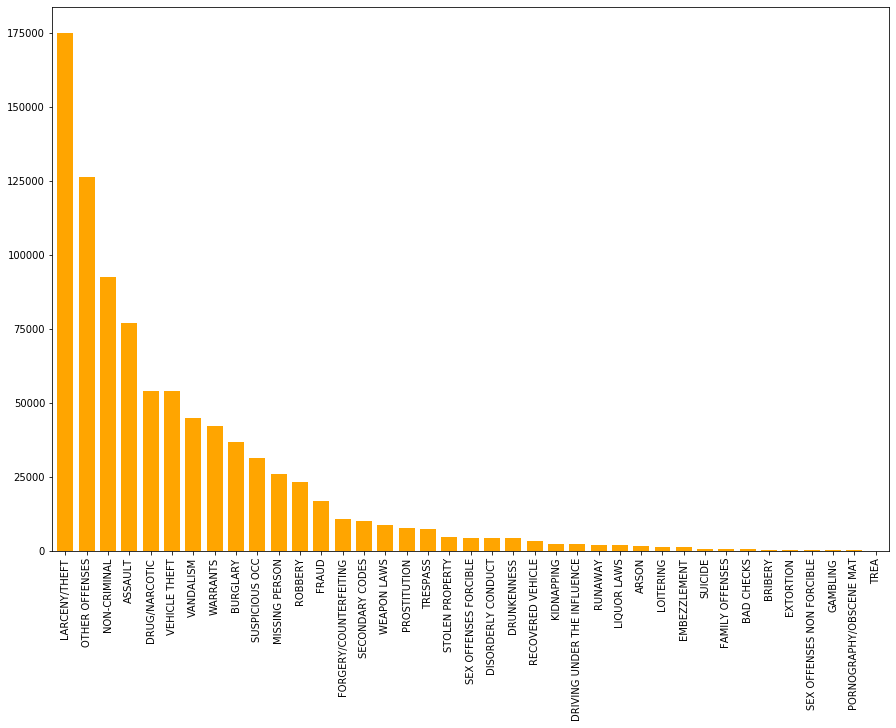

In [107]:
train['Category'].value_counts().plot(kind='bar',width=0.75,figsize=(15,10),color='orange')

In [109]:
#Function to convert each crime category to either White collar crime or Blue Collar crime
def White_OR_Blue(s):
    if (s['Category']=='WARRANTS') or (s['Category'] == 'NON-CRIMINAL') or (s['Category']=='FORGERY/COUNTERFEITING') or (s['Category']=='FRAUD') or (s['Category']=='BRIBERY') or (s['Category']=='EMBEZZLEMENT') or (s['Category']=='EXTORTION') or (s['Category']=='GAMBLING') or (s['Category']=='BAD CHECKS') or (s['Category']=='OTHER OFFENSES'):
        return int(1)
    elif (s['Category']=='LARCENY/THEFT') or (s['Category']=='VEHICLE THEFT') or (s['Category']=='VANDALISM') or (s['Category']=='ROBBERY') or (s['Category']=='ASSAULT') or (s['Category']=='WEAPON LAWS') or (s['Category']=='BURGLARY') or (s['Category']=='SUSPICIOUS OCC') or (s['Category']=='DRUNKENNESS') or (s['Category']=='DRUG/NARCOTIC') or (s['Category']=='STOLEN PROPERTY') or (s['Category']=='SECONDARY CODES') or (s['Category']=='TRESPASS') or (s['Category']=='MISSING PERSON') or (s['Category']=='KIDNAPPING') or (s['Category']=='RUNAWAY') or (s['Category']=='DRIVING UNDER THE INFLUENCE') or (s['Category']=='SEX OFFENSES FORCIBLE') or (s['Category']=='PROSTITUTION') or (s['Category']=='DISORDERLY CONDUCT') or (s['Category']=='ARSON') or (s['Category']=='FAMILY OFFENSES') or (s['Category']=='LIQUOR LAWS') or (s['Category']=='SUICIDE') or (s['Category']=='LOITERING') or (s['Category']=='SEX OFFENSES NON FORCIBLE') or (s['Category']=='TREA') or (s['Category']=='RECOVERED VEHICLE') or (s['Category']=='PORNOGRAPHY/OBSCENE MAT'):
        return int(0)

In [110]:
train['New Category'] = train.apply(White_OR_Blue, axis=1)

In [111]:
train

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category
0,5/13/2015 23:53,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
1,5/13/2015 23:53,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
2,5/13/2015 23:33,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1
3,5/13/2015 23:30,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0
4,5/13/2015 23:30,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0
...,...,...,...,...,...,...,...,...,...
878044,1/6/2003 0:15,ROBBERY,Monday,TARAVAL,-122.459033,37.714056,FARALLONES,ST / CAPITOL AV,0
878045,1/6/2003 0:01,LARCENY/THEFT,Monday,INGLESIDE,-122.447363,37.731948,600,Block of EDNA ST,0
878046,1/6/2003 0:01,LARCENY/THEFT,Monday,SOUTHERN,-122.403390,37.780266,5TH,ST / FOLSOM ST,0
878047,1/6/2003 0:01,VANDALISM,Monday,SOUTHERN,-122.390531,37.780607,TOWNSEND,ST / 2ND ST,0


In [112]:
train[train.isnull().any(axis=1)]

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category


In [113]:
for obj in train['New Category']:
    obj =int(round(obj))

In [114]:
train.head()


,Dates,Category,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category
0,5/13/2015 23:53,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
1,5/13/2015 23:53,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
2,5/13/2015 23:33,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1
3,5/13/2015 23:30,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0
4,5/13/2015 23:30,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0


In [115]:
#Removing Category values
train.drop(['Category'], axis=1, inplace=True)

In [116]:
train.head()

,Dates,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category
0,5/13/2015 23:53,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
1,5/13/2015 23:53,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1
2,5/13/2015 23:33,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1
3,5/13/2015 23:30,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0
4,5/13/2015 23:30,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0


In [117]:
#Converting Dates filed to pandas datetime
train.Dates = train.Dates.apply(pd.to_datetime)

In [118]:
#Splitting Dates field to year, month, day, hour
train['Year'] = train.Dates.dt.year
train['Month'] = train.Dates.dt.month
train['Day'] = train.Dates.dt.day
train['Hour'] = train.Dates.dt.hour

In [119]:
train.head()

,Dates,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour
0,2015-05-13 23:53:00,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
1,2015-05-13 23:53:00,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
2,2015-05-13 23:33:00,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1,2015,5,13,23
3,2015-05-13 23:30:00,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0,2015,5,13,23
4,2015-05-13 23:30:00,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0,2015,5,13,23


In [120]:
train.to_csv('train2.csv')

In [121]:
train.drop('Dates', axis=1, inplace=True)

In [122]:
train.head()

,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour
0,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
1,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
2,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1,2015,5,13,23
3,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0,2015,5,13,23
4,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0,2015,5,13,23


# DATA VISUALIZATION

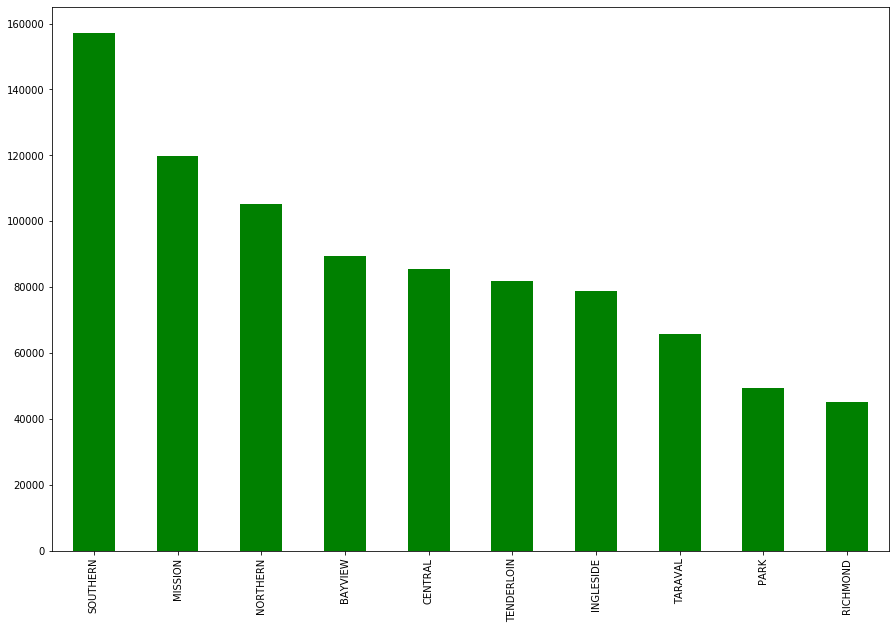

In [123]:
train['PdDistrict'].value_counts().plot(kind='bar',width=0.5,figsize=(15,10),color='Green')

In [124]:
Crimes_date =train['DayOfWeek'].value_counts()
Crimes_date

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

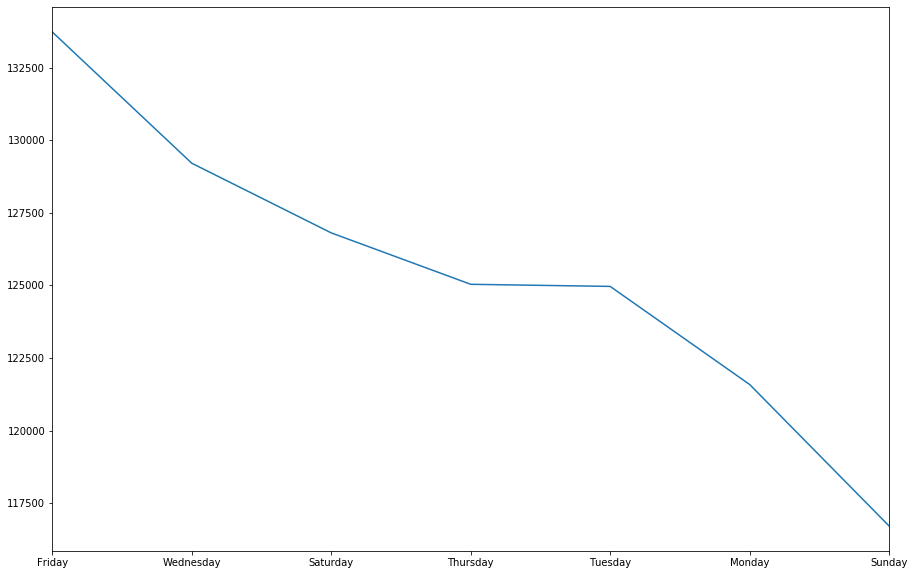

In [125]:
train['DayOfWeek'].value_counts().plot(figsize=(15,10))

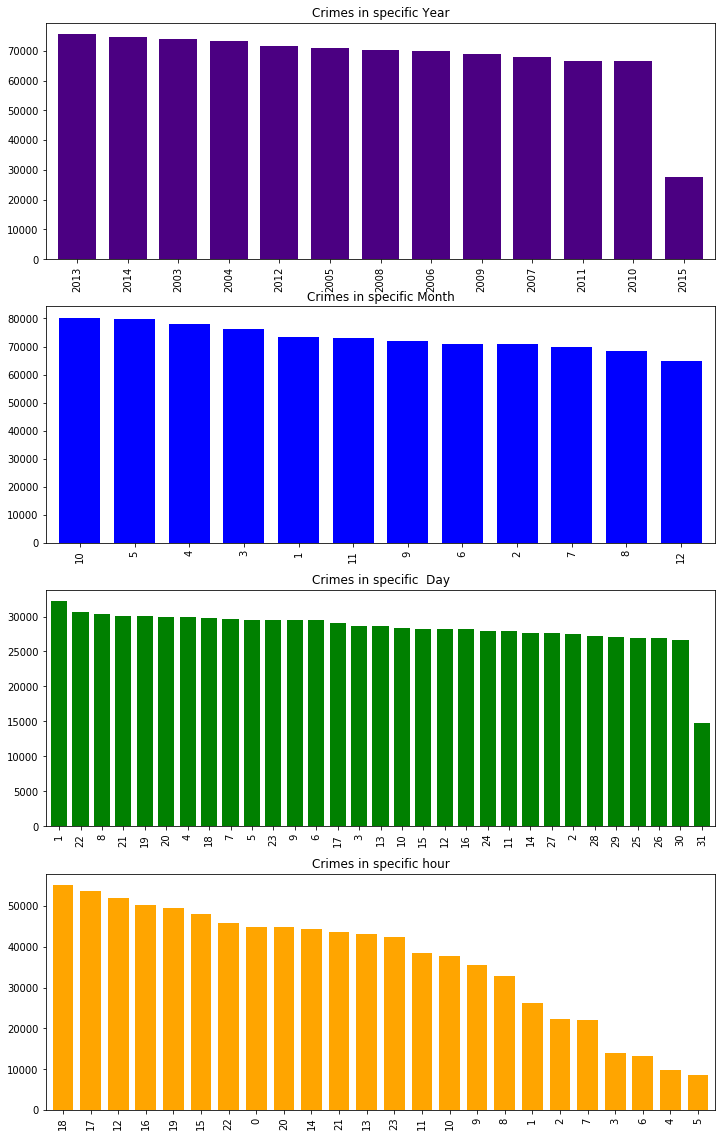

In [126]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, sharex=False)

train['Year'].value_counts().plot(kind='bar',title = 'Crimes in specific Year',width=0.75,figsize=(12,20),color='Indigo',ax=ax1)

train['Month'].value_counts().plot(kind='bar',title='Crimes in specific Month',width=0.75,figsize=(12,20),color='Blue',ax=ax2)

train['Day'].value_counts().plot(kind='bar',title = 'Crimes in specific  Day',width=0.75,figsize=(12,20),color='Green',ax=ax3)

train['Hour'].value_counts().plot(kind='bar',title='Crimes in specific hour',width=0.75,figsize=(12,20),color='Orange',ax=ax4)


#df.profit.plot(ax=ax1
#df.revenue.plot(kind='bar', ax=ax2)

In [127]:
train.head()

,DayOfWeek,PdDistrict,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour
0,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
1,Wednesday,NORTHERN,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23
2,Wednesday,NORTHERN,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1,2015,5,13,23
3,Wednesday,NORTHERN,-122.426995,37.800873,1500,Block of LOMBARD ST,0,2015,5,13,23
4,Wednesday,PARK,-122.438738,37.771541,100,Block of BRODERICK ST,0,2015,5,13,23


In [128]:
#One-hot encoding categorical values in testing data
train=pd.get_dummies(train, columns=['DayOfWeek','PdDistrict'])
train.head()

,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,VANNESS,AV / GREENWICH ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,1500,Block of LOMBARD ST,0,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,100,Block of BRODERICK ST,0,2015,5,13,23,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
# PCA on co-ordinates
from sklearn.decomposition import PCA
pca_encode=PCA().fit(train[["X","Y"]])
train[["X","Y"]]=pca_encode.transform(train[["X","Y"]])

In [130]:
train.shape

(878049, 26)

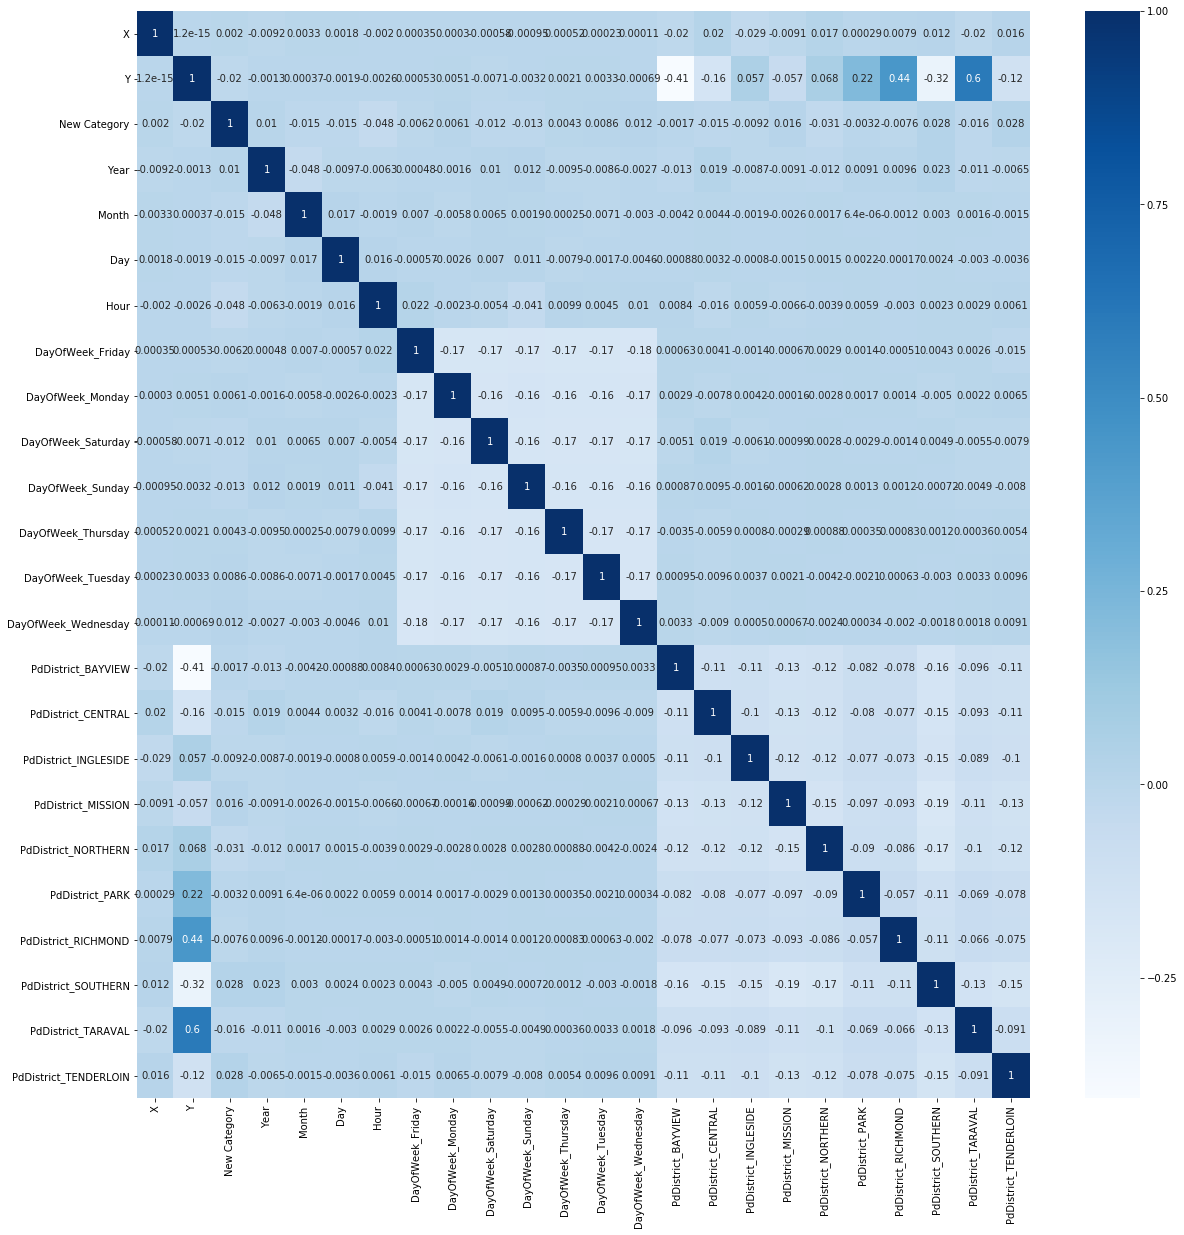

In [31]:
#Feature Selection
#Using Pearson Correlation

plt.figure(figsize=(20,20))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [32]:
#Correlation with output variable
cor_target = abs(cor["New Category"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
relevant_features

X                        0.001997
Y                        0.019968
New Category             1.000000
Year                     0.010497
Month                    0.014721
Day                      0.014551
Hour                     0.048450
DayOfWeek_Friday         0.006196
DayOfWeek_Monday         0.006125
DayOfWeek_Saturday       0.011762
DayOfWeek_Sunday         0.013358
DayOfWeek_Thursday       0.004261
DayOfWeek_Tuesday        0.008614
DayOfWeek_Wednesday      0.012086
PdDistrict_BAYVIEW       0.001734
PdDistrict_CENTRAL       0.014743
PdDistrict_INGLESIDE     0.009157
PdDistrict_MISSION       0.015587
PdDistrict_NORTHERN      0.030935
PdDistrict_PARK          0.003166
PdDistrict_RICHMOND      0.007597
PdDistrict_SOUTHERN      0.027935
PdDistrict_TARAVAL       0.015623
PdDistrict_TENDERLOIN    0.027577
Name: New Category, dtype: float64

In [131]:
train.head()

,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
1,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
2,0.029309,0.002840,VANNESS,AV / GREENWICH ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
3,0.029669,0.005488,1500,Block of LOMBARD ST,0,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.000080,0.016129,100,Block of BRODERICK ST,0,2015,5,13,23,0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
train2 = train.copy()
train2.head()

,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
1,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
2,0.029309,0.002840,VANNESS,AV / GREENWICH ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
3,0.029669,0.005488,1500,Block of LOMBARD ST,0,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.000080,0.016129,100,Block of BRODERICK ST,0,2015,5,13,23,0,...,0,0,0,0,0,1,0,0,0,0


In [133]:
y=train.iloc[:,2]

In [134]:
type(y)

pandas.core.series.Series

In [135]:
y.shape

(878049,)

In [136]:
x=train.drop('New Category', axis=1, inplace=True)

In [137]:
x=train.copy()
x.head()

,X,Y,Block_Number,Street_Name,Year,Month,Day,Hour,DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.003454,0.003406,OAK,ST / LAGUNA ST,2015,5,13,23,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.003454,0.003406,OAK,ST / LAGUNA ST,2015,5,13,23,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.029309,0.002840,VANNESS,AV / GREENWICH ST,2015,5,13,23,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.029669,0.005488,1500,Block of LOMBARD ST,2015,5,13,23,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.000080,0.016129,100,Block of BRODERICK ST,2015,5,13,23,0,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
type(x)

pandas.core.frame.DataFrame

In [139]:
from sklearn.model_selection import train_test_split
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [140]:
type(x_test)

pandas.core.frame.DataFrame

# Random Forest 

In [101]:
# Random Forest Classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

clf_A = RandomForestClassifier(max_depth=13, n_estimators=200)
clf_A.fit(x_train, y_train)
clf_probs = clf_A.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
score

0.6173078922537738

Accuracy of Random Forest classifier on test set: 0.67

Confusion Matrix is :
 [[147048    272]
 [ 71709    484]]

 Printing Confusion Matrix



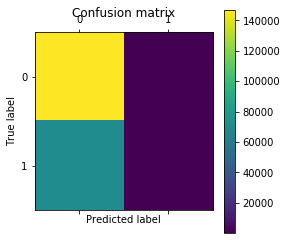

Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    147320
           1       0.64      0.01      0.01     72193

    accuracy                           0.67    219513
   macro avg       0.66      0.50      0.41    219513
weighted avg       0.66      0.67      0.54    219513



In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = clf_A.predict(x_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_A.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [105]:
# Random Forest Classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

clf_A = RandomForestClassifier(max_depth=20, n_estimators=200)
clf_A.fit(x_train, y_train)
clf_probs = clf_A.predict_proba(x_test)
score = log_loss(y_test, clf_probs)
score

0.610562291834102

Accuracy of Random Forest classifier on test set: 0.68

Confusion Matrix is :
 [[141590   5730]
 [ 65281   6912]]

 Printing Confusion Matrix



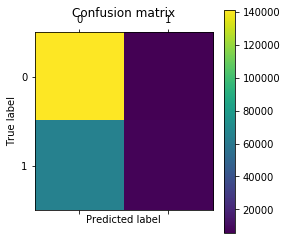

Classification Report is:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80    147320
           1       0.55      0.10      0.16     72193

    accuracy                           0.68    219513
   macro avg       0.62      0.53      0.48    219513
weighted avg       0.64      0.68      0.59    219513



In [117]:
y_pred = clf_A.predict(x_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_A.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Naive Bayes

In [107]:
# Naive-Bayes
from sklearn.naive_bayes import BernoulliNB
clf_D = BernoulliNB()
clf_D.fit(x_train,y_train)
clf_probs_nb = clf_D.predict_proba(x_test)
score = log_loss(y_test, clf_probs_nb)
score

0.6318769791253148

Accuracy of Bayesian classifier on test set: 0.67

Confusion Matrix is :
 [[147320      0]
 [ 72193      0]]

 Printing Confusion Matrix



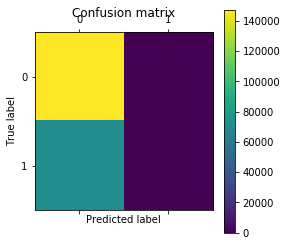

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    147320
           1       0.00      0.00      0.00     72193

    accuracy                           0.67    219513
   macro avg       0.34      0.50      0.40    219513
weighted avg       0.45      0.67      0.54    219513



In [108]:
y_pred = clf_D.predict(x_test)
print('Accuracy of Bayesian classifier on test set: {:.2f}'.format(clf_D.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# KNN

In [111]:
#KNN
import time
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
#y_pred_knn = clf_knn.predict(x_test)
log_loss_knn = log_loss(y_test, y_pred_knn)
print ("nearest neighbors log_loss: ",log_loss_knn)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

nearest neighbors log_loss:  13.147984402262896
--- Time taken is 117.19653010368347 seconds ---


# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
clf_DecisTr = DecisionTreeClassifier()
clf_DecisTr.fit(x_train, y_train)
y_pred_DecisTr = clf_DecisTr.predict(x_test)
log_loss_DecisTr = log_loss(y_test, y_pred_DecisTr)
print ("Decision Tree log_loss: ",log_loss_DecisTr)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

Decision Tree log_loss:  13.336515198806964
--- Time taken is 16.296549797058105 seconds ---


Accuracy of Decision Tree classifier on test set: 0.61

Confusion Matrix is :
 [[107583  39737]
 [ 45023  27170]]

 Printing Confusion Matrix



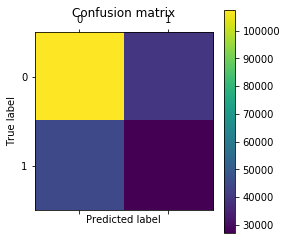

Classification Report is:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72    147320
           1       0.41      0.38      0.39     72193

    accuracy                           0.61    219513
   macro avg       0.56      0.55      0.55    219513
weighted avg       0.61      0.61      0.61    219513



In [120]:
y_pred = clf_DecisTr.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_DecisTr.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Logistic Regression

In [119]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
start_time = time.time()
clf_B = LogisticRegression(C=.001)
clf_B.fit(x_train,y_train)
clf_probs_logit = clf_B.predict_proba(x_test)
score = log_loss(y_test, clf_probs_logit)
print ("Logistic Regression log_loss: ",score)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression log_loss:  0.6320156969975402
--- Time taken is 3.2093424797058105 seconds ---


Accuracy of Decision Tree classifier on test set: 0.67

Confusion Matrix is :
 [[147320      0]
 [ 72193      0]]

 Printing Confusion Matrix



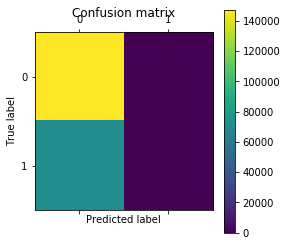

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report is:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80    147320
           1       0.00      0.00      0.00     72193

    accuracy                           0.67    219513
   macro avg       0.34      0.50      0.40    219513
weighted avg       0.45      0.67      0.54    219513



In [122]:
y_pred = clf_B.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_B.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# SVM

In [124]:
from sklearn.svm import LinearSVC
start_time = time.time()
clf_svm = LinearSVC()
clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)
log_loss_svm = log_loss(y_test, y_pred_svm)
print ('Linear SVM log_loss:', log_loss_svm)
print("--- Time taken is %s seconds ---" % (time.time() - start_time))

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM log_loss: 23.180268754887678
--- Time taken is 310.33733558654785 seconds ---


Accuracy of Decision Tree classifier on test set: 0.33

Confusion Matrix is :
 [[     0 147320]
 [     0  72193]]

 Printing Confusion Matrix



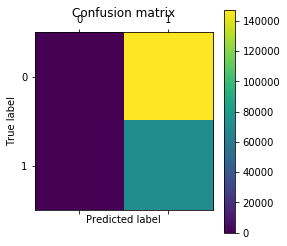

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    147320
           1       0.33      1.00      0.49     72193

    accuracy                           0.33    219513
   macro avg       0.16      0.50      0.25    219513
weighted avg       0.11      0.33      0.16    219513



In [125]:
y_pred = clf_svm.predict(x_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_svm.score(x_test, y_test))) 

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix is :\n',cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\n Printing Confusion Matrix\n')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Deep Neural Network

In [142]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)

In [144]:
train2.head()

,X,Y,Block_Number,Street_Name,New Category,Year,Month,Day,Hour,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
1,0.003454,0.003406,OAK,ST / LAGUNA ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
2,0.029309,0.002840,VANNESS,AV / GREENWICH ST,1,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
3,0.029669,0.005488,1500,Block of LOMBARD ST,0,2015,5,13,23,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.000080,0.016129,100,Block of BRODERICK ST,0,2015,5,13,23,0,...,0,0,0,0,0,1,0,0,0,0


In [146]:
train2.drop(['Block_Number', 'Street_Name'], axis=1, inplace=True)

In [147]:
x,y = to_xy(train2,"New Category")

In [148]:
x1,x2,y1,y2=train_test_split(x,y)

In [149]:
x1

array([[-5.6434404e-03, -5.3420616e-03,  2.0050000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.2350207e-03, -5.4850890e-03,  2.0070000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.5896767e-02, -3.2499406e-02,  2.0080000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-4.8275769e-02, -2.8487930e-02,  2.0040000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.1719219e-02, -1.0969501e-02,  2.0080000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.8253133e-02, -1.0875235e-02,  2.0140000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [150]:
y1

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [151]:
x2

array([[ 2.3988490e-03,  3.5969153e-02,  2.0110000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.3871489e-02,  2.4455344e-02,  2.0050000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.8984882e-02, -1.4961015e-02,  2.0080000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.8333638e-02, -1.6165838e-02,  2.0050000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.7390953e-02, -2.1390244e-02,  2.0090000e+03, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.4169691e-02, -2.3348920e-02,  2.0080000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [152]:
y2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [153]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\saipo\Desktop\CSC215\finalproject\wts1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

    # Build network
    model = Sequential()
    model.add(Dense(512, input_dim=x1.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(y1.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x1,y1,validation_data=(x2,y2),callbacks=[monitor,checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()


0
Train on 658536 samples, validate on 219513 samples
Epoch 1/10
 - 147s - loss: 1.0318 - val_loss: 0.6347
Epoch 2/10
 - 143s - loss: 0.6346 - val_loss: 0.6348
Epoch 3/10
 - 150s - loss: 0.6346 - val_loss: 0.6347
Epoch 4/10
 - 147s - loss: 0.6346 - val_loss: 0.6347
Epoch 5/10
 - 151s - loss: 0.6346 - val_loss: 0.6347
Epoch 6/10
 - 140s - loss: 0.6346 - val_loss: 0.6347
Epoch 00006: early stopping
1
Train on 658536 samples, validate on 219513 samples
Epoch 1/10
 - 131s - loss: 1.0497 - val_loss: 0.6347
Epoch 2/10
 - 143s - loss: 0.6347 - val_loss: 0.6347
Epoch 3/10
 - 132s - loss: 0.6346 - val_loss: 0.6347
Epoch 4/10
 - 139s - loss: 0.6346 - val_loss: 0.6347
Epoch 5/10
 - 152s - loss: 0.6346 - val_loss: 0.6347
Epoch 6/10
 - 137s - loss: 0.6346 - val_loss: 0.6348
Epoch 00006: early stopping
2
Train on 658536 samples, validate on 219513 samples
Epoch 1/10
 - 137s - loss: 1.0600 - val_loss: 0.6347
Epoch 2/10
 - 157s - loss: 0.6346 - val_loss: 0.6347
Epoch 3/10
 - 134s - loss: 0.6346 - val_

In [154]:
model.load_weights(r"C:\Users\saipo\Desktop\CSC215\finalproject\wts1.hdf5") # load weights from best model

# Measure accuracy
pred = model.predict(x2)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y2,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.6692997681230725


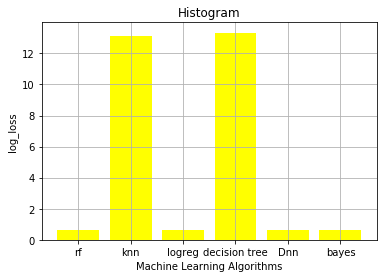

In [3]:
#seed is a function of numpy, which will give the same output each time it is executed.
np.random.seed(100)
names = ('rf','knn','logreg','decision tree','Dnn','bayes')
y_pos = np.arange(len(names))

bins = np.arange(len(names))
data= [0.61,13.14,0.632,13.33,0.634,0.631]


plt.bar(bins, data, align='center', facecolor='yellow')
plt.ylabel('log_loss')
plt.xlabel('Machine Learning Algorithms')
plt.title(r'Histogram')

plt.grid(True)

plt.xticks(y_pos, names)

plt.show()